# Clustering and Annotation of cell segmentations

Segmentation was performed with Baysor

*Remember: The Baysor preview is vertically mirrored from Visualizer*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import anndata as ad
import pickle as pk

## Importing some stuff

In [ ]:
# Orginal MERSCOPE transcripts
genes = pd.read_csv("../data/detected_transcripts_wPixel.csv")

In [3]:
genes.head()

Unnamed: 0  barcode_id    global_x   global_y  global_z          x  \
0         161           0  205.033570  3673.6423       0.0  1898.4589   
1        1202           0  127.298164  3624.1118       2.0  1178.6866   
2        3738           0  102.508125  3625.4592       6.0   949.1493   
3       11489           3  146.474410  3673.4827       4.0  1356.2445   
4       13130           4  138.442900  3771.7260       0.0  1281.8787   

            y  fov   gene    transcript_id  global_xpixel  global_ypixel  
0   679.20660    0    CD4  ENST00000011653    1898.457695   34015.183434  
1   220.59117    0    CD4  ENST00000011653    1178.685905   33556.568004  
2   233.06530    0    CD4  ENST00000011653     949.148662   33569.043922  
3   677.72650    0   CD22  ENST00000085219    1356.243618   34013.705657  
4  1587.38840    0  TBX21  ENST00000177694    1281.877835   34923.365226

In [2]:
# Baysor predictions
dat = pd.read_csv("../02-Baysor/segment_20_50/segmentation.csv")
dat.head()

Unnamed: 0  barcode_id    global_x   global_y    z  x_reserved  y_reserved  \
0         161           0  205.033570  3673.6423  0.0   1898.4589   679.20660   
1        1202           0  127.298164  3624.1118  2.0   1178.6866   220.59117   
2        3738           0  102.508125  3625.4592  6.0    949.1493   233.06530   
3       11489           3  146.474410  3673.4827  4.0   1356.2445   677.72650   
4       13130           4  138.442900  3771.7260  0.0   1281.8787  1587.38840   

   fov   gene    transcript_id            x             y  molecule_id  \
0    0    CD4  ENST00000011653  1898.457695  34015.183434            1   
1    0    CD4  ENST00000011653  1178.685905  33556.568004            2   
2    0    CD4  ENST00000011653   949.148662  33569.043922            3   
3    0   CD22  ENST00000085219  1356.243618  34013.705657            4   
4    0  TBX21  ENST00000177694  1281.877835  34923.365226            5   

   prior_segmentation  confidence  cluster  cell  assignment_confidence  \
0                   0        0.00        2     0                    1.0   
1                   1        0.04        2     0                    1.0   
2                   1        0.04        2     0                    1.0   
3                   1        0.04        2     0                    1.0   
4                   1        0.04        2     0                    1.0   

   is_noise ncv_color  
0      True   #FFA763  
1      True   #002BB3  
2      True   #51692F  
3      True   #9300AB  
4      True   #6800B6

In [42]:
# shouldn't need to do this anymore...
# scale = (dat['global_y'][1] - dat['global_y'][0]) / (dat['y'][1] - dat['y'][0])
# print(dat['global_x'].min()/scale)
# print(dat['global_x'].max()/scale)
# print(dat['global_y'].min()/scale)
# print(dat['global_y'].max()/scale)

7505.985124388317
9357.960231162784
46398.076532003135
48249.87812063079


In [4]:
adata.obs.head()

cluster            x             y     global_x     global_y  n_genes  \
cell                                                                          
1           4  8774.483102  20983.492352   947.644817  2266.218710       14   
2           3  9388.107239  20537.853973  1013.916269  2218.089732      131   
3           3  8612.135032  21270.845876   930.111214  2297.252911       26   
4           3  8817.080257  21114.284897   952.245313  2280.344314       59   
5           4  8926.430365  20963.382572   964.055133  2264.046852       18   

      n_genes_by_counts  total_counts leiden  
cell                                          
1                    14          21.0      4  
2                   131         459.0      1  
3                    26          36.0      8  
4                    59         100.0      8  
5                    18          27.0     13

In [5]:
# preview small section of data
# small = adata.obs[(adata.obs['x'] > 55000) & (adata.obs['x'] < 57000) & (adata.obs['y'] > 55000) & (adata.obs['y'] < 57000)]
small = dat[(dat['x'] > 55000) & (dat['x'] < 57000) & (dat['y'] > 55000) & (dat['y'] < 57000)]
small.shape

(90995, 20)

In [6]:
new_id_dict = dict(zip(list(small['cell'].unique()), range(small['cell'].nunique())))
small['new_cell'] = small['cell'].apply(lambda x: new_id_dict[x])

/tmp/ipykernel_708851/297230123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['new_cell'] = small['cell'].apply(lambda x: new_id_dict[x])


In [8]:
small.tail()

Unnamed: 0  barcode_id   global_x   global_y    z  x_reserved  \
22088382     1833571         397  6074.8090  5946.7305  4.0   688.23175   
22088383     1833647         397  6015.0054  5970.5283  4.0   134.49240   
22088384     1833670         397  6098.5854  5978.3174  4.0   908.38385   
22088387     1834135         397  6106.9727  5962.6130  5.0   986.04380   
22088394     1834678         397  6015.0590  5970.0240  6.0   134.99113   

          y_reserved  fov  gene    transcript_id  ...             y  \
22088382   1354.3197  739  MYCN  ENST00000638417  ...  55062.282136   
22088383   1574.6713  739  MYCN  ENST00000638417  ...  55282.631987   
22088384   1646.7924  739  MYCN  ENST00000638417  ...  55354.753234   
22088387   1501.3800  739  MYCN  ENST00000638417  ...  55209.342222   
22088394   1570.0000  739  MYCN  ENST00000638417  ...  55277.962546   

          molecule_id  prior_segmentation  confidence  cluster   cell  \
22088382     22088383                   0     0.86631        4      0   
22088383     22088384                   0     0.99857        3  72355   
22088384     22088385                   0     0.99980        3  74095   
22088387     22088388                   0     0.95404        4      0   
22088394     22088395                   0     0.99895        3  72355   

          assignment_confidence  is_noise  ncv_color new_cell  
22088382                   0.84      True    #4C0062        1  
22088383                   1.00     False    #770068       20  
22088384                   0.98     False    #7B49D0      280  
22088387                   0.72      True    #4B3DA8        1  
22088394                   0.98     False    #71006B       20  

[5 rows x 21 columns]

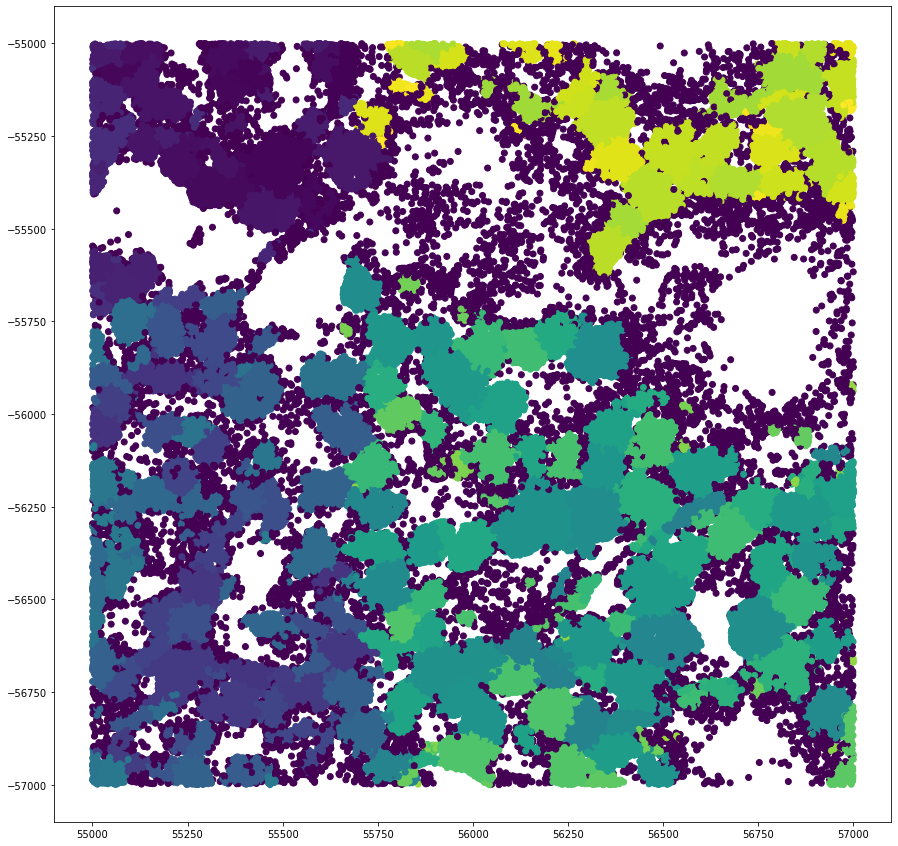

In [11]:
plt.figure(figsize=(15, 15))
plt.scatter(small['x'], -small['y'], c=small['new_cell'])
plt.show()

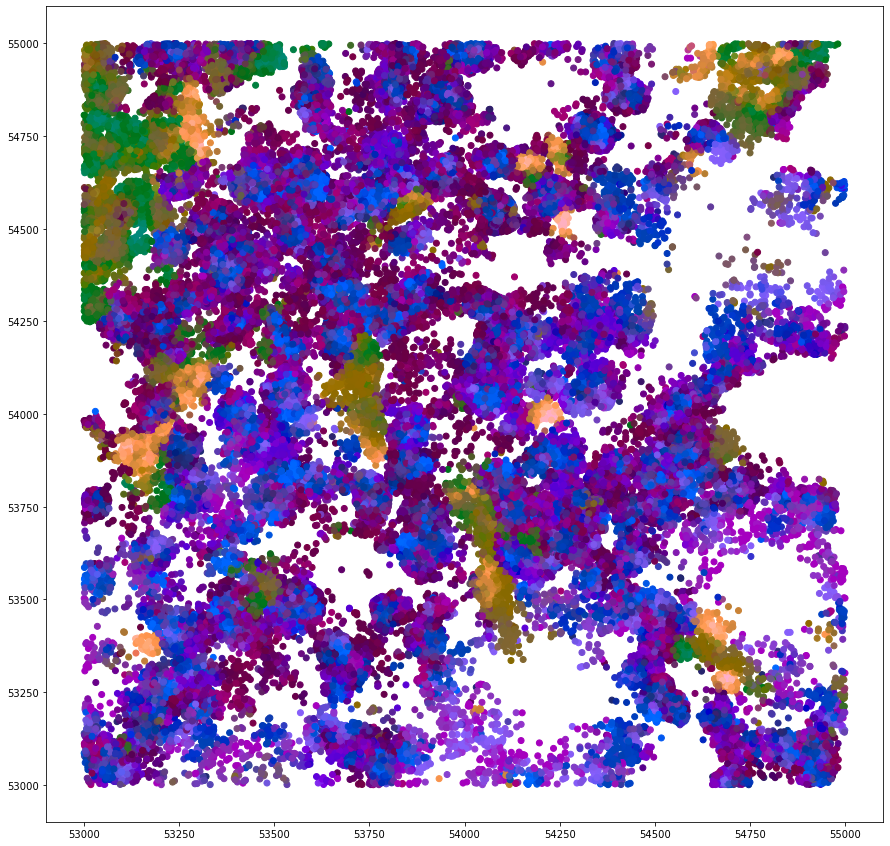

In [31]:
plt.figure(figsize=(15, 15))
plt.scatter(small['x'], small['y'], c=small['ncv_color'])
plt.show()

In [27]:
small[small['x']==small['x'].min()].head()

Unnamed: 0  barcode_id  global_x   global_y    z  x_reserved  \
16958692     1558663         344  5400.008  5462.6006  0.0   1848.0703   

          y_reserved  fov  gene    transcript_id  ...             y  \
16958692   575.63605  610  RTN3  ENST00000537981  ...  50579.600914   

          molecule_id  prior_segmentation  confidence  cluster   cell  \
16958692     16958693                   0     0.99773        3  52004   

          assignment_confidence  is_noise  ncv_color new_cell  
16958692                    1.0     False    #593FA9        9  

[1 rows x 21 columns]

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


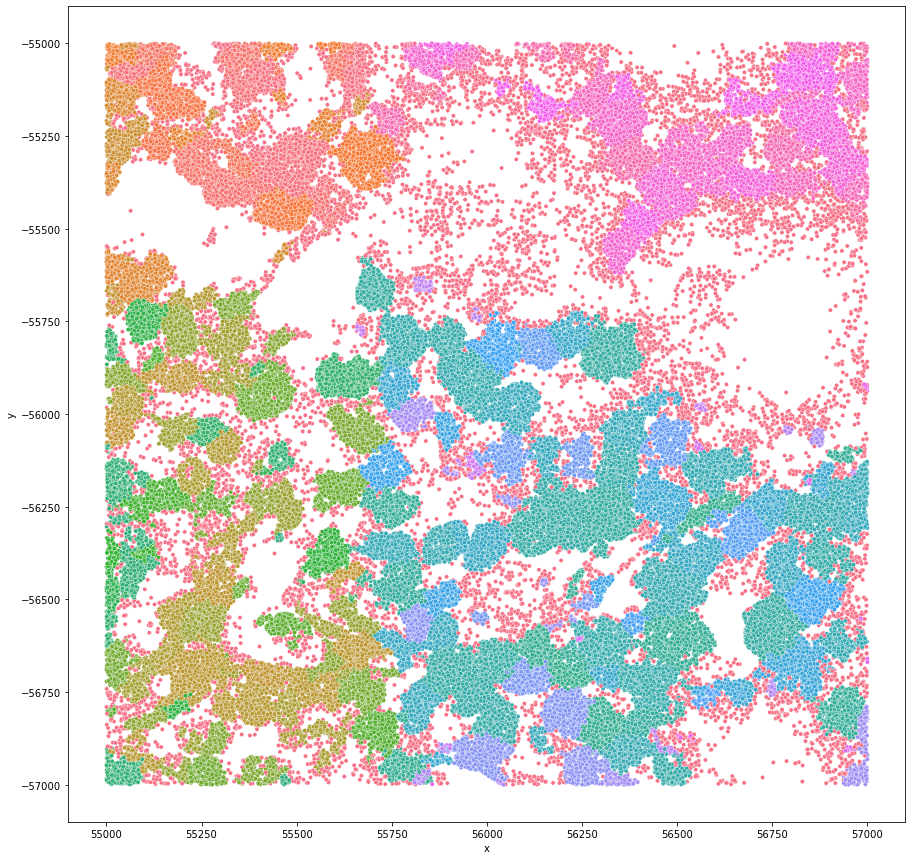

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
out = sns.scatterplot(small['x'], -small['y'], hue=small['new_cell'].astype(str), size=0.1, legend=False)
out = out.get_figure()
# out.savefig("plots/small_seg_2.png")
plt.show()

## Making an AnnData object

I'll need two dataframes; count matrix, and metadata
- collapse on cell ID
- count gene occurances
- average x, y coordinates
- average global coordinates
- median or mode cluster, should all be the same number

In [33]:
dat.columns

Index(['Unnamed: 0', 'barcode_id', 'global_x', 'global_y', 'z', 'x_reserved',
       'y_reserved', 'fov', 'gene', 'transcript_id', 'x', 'y', 'molecule_id',
       'prior_segmentation', 'confidence', 'cluster', 'cell',
       'assignment_confidence', 'is_noise', 'ncv_color'],
      dtype='object')

In [39]:
# datTrim = dat[['cell', 'cluster' , 'gene', 'x', 'y', 'global_x', 'global_y']]
datTrim = datTrim[datTrim['cell'] != 0]
datTrim.head()

cell  cluster    gene            x             y   global_x   global_y
2945   116        1  COL1A1  3534.432142  30598.982971  381.71893  3304.6924
2947   116        1  COL1A1  3537.630288  30611.694073  382.06433  3306.0652
3006   116        1  COL1A1  3536.396030  30598.182972  381.93103  3304.6060
3007   116        1  COL1A1  3540.444175  30603.590375  382.36823  3305.1900
3070   116        1  COL1A1  3539.665194  30601.407969  382.28410  3304.9543

In [45]:
count = datTrim.groupby(['cell', 'gene']).agg(count=('gene', 'count')).reset_index()
count = count.pivot(index='cell', columns='gene', values='count')
count.shape

(140417, 398)

In [49]:
meta = datTrim.groupby('cell').agg({
    'cluster':'first',
    'x':'mean',
    'y':'mean',
    'global_x':'mean',
    'global_y':'mean'})
meta.index = meta.index.map(str)
meta.head()

cluster            x             y     global_x     global_y
cell                                                              
1           4  8774.483102  20983.492352   947.644817  2266.218710
2           3  9388.107239  20537.853973  1013.916269  2218.089732
3           3  8612.135032  21270.845876   930.111214  2297.252911
4           3  8817.080257  21114.284897   952.245313  2280.344314
5           4  8926.430365  20963.382572   964.055133  2264.046852

In [52]:
count.fillna(0, inplace=True)
count.head()

gene  A2M  ABCC2  ABCG2  ABTB2  ACLY  ACSL1  ACTA2  ADAMTS9  ADCYAP1  ADGRB3  \
cell                                                                           
1     0.0    0.0    0.0    0.0   0.0    0.0    0.0      0.0      0.0     0.0   
2     0.0    0.0    0.0    0.0   5.0    3.0    0.0      0.0      0.0     3.0   
3     0.0    0.0    0.0    0.0   1.0    0.0    0.0      0.0      0.0     1.0   
4     0.0    0.0    0.0    0.0   1.0    0.0    0.0      0.0      0.0     1.0   
5     0.0    0.0    0.0    0.0   0.0    0.0    0.0      0.0      0.0     0.0   

gene  ...  VIM  WWTR1  ZBTB16  ZBTB20  ZFAND3  ZFHX3  ZFPM2  ZHX2  ZNF331  \
cell  ...                                                                   
1     ...  0.0    0.0     0.0     0.0     0.0    1.0    0.0   0.0     0.0   
2     ...  0.0    0.0     0.0     1.0     0.0    3.0    0.0   0.0     1.0   
3     ...  0.0    0.0     0.0     0.0     0.0    1.0    0.0   0.0     0.0   
4     ...  0.0    0.0     0.0     0.0     0.0    0.0    0.0   0.0     0.0   
5     ...  0.0    0.0     1.0     0.0     0.0    0.0    0.0   0.0     0.0   

gene  ZNF804A  
cell           
1         0.0  
2         2.0  
3         0.0  
4         0.0  
5         0.0  

[5 rows x 398 columns]

In [89]:
adata = ad.AnnData(count)

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [90]:
adata.obs = meta

In [2]:
# adata.write('baysor_seg.h5ad')
adata = ad.read('baysor_seg.h5ad')

## Processing and Clustering

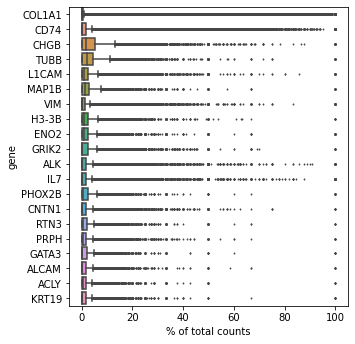

In [95]:
sc.pl.highest_expr_genes(adata, n_top=20) # looks like there are cells that only contain one gene?

In [96]:
sc.pp.filter_cells(adata, min_genes=3)
sc.pp.filter_genes(adata, min_cells=100)
adata

AnnData object with n_obs × n_vars = 137765 × 398
    obs: 'cluster', 'x', 'y', 'global_x', 'global_y', 'n_genes'
    var: 'n_cells'

In [97]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

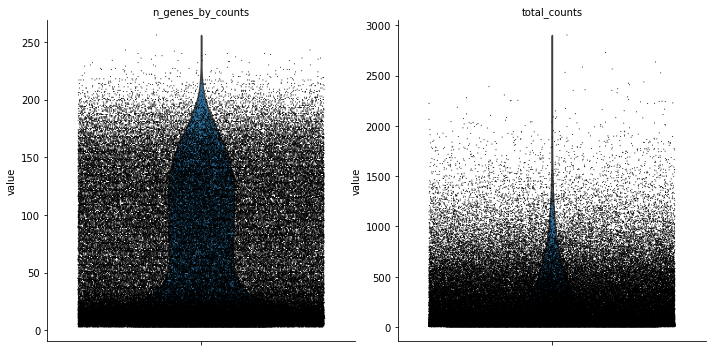

In [98]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

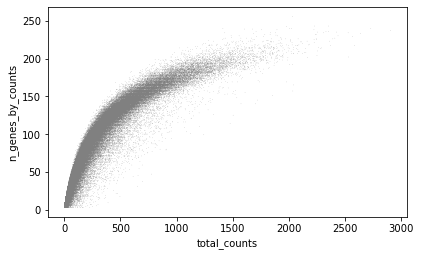

In [99]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [100]:
adata = adata[adata.obs.total_counts < 2000, :]

In [101]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [102]:
adata.raw = adata

In [104]:
sc.pp.scale(adata, max_value=10)

In [105]:
sc.tl.pca(adata, svd_solver='arpack')

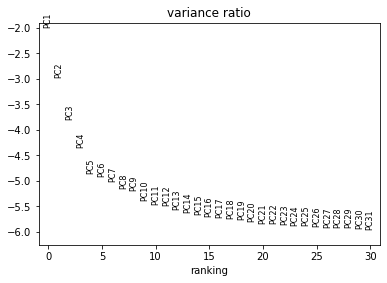

In [106]:
sc.pl.pca_variance_ratio(adata, log=True)

In [107]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

In [108]:
sc.tl.umap(adata)

In [109]:
sc.tl.leiden(adata)

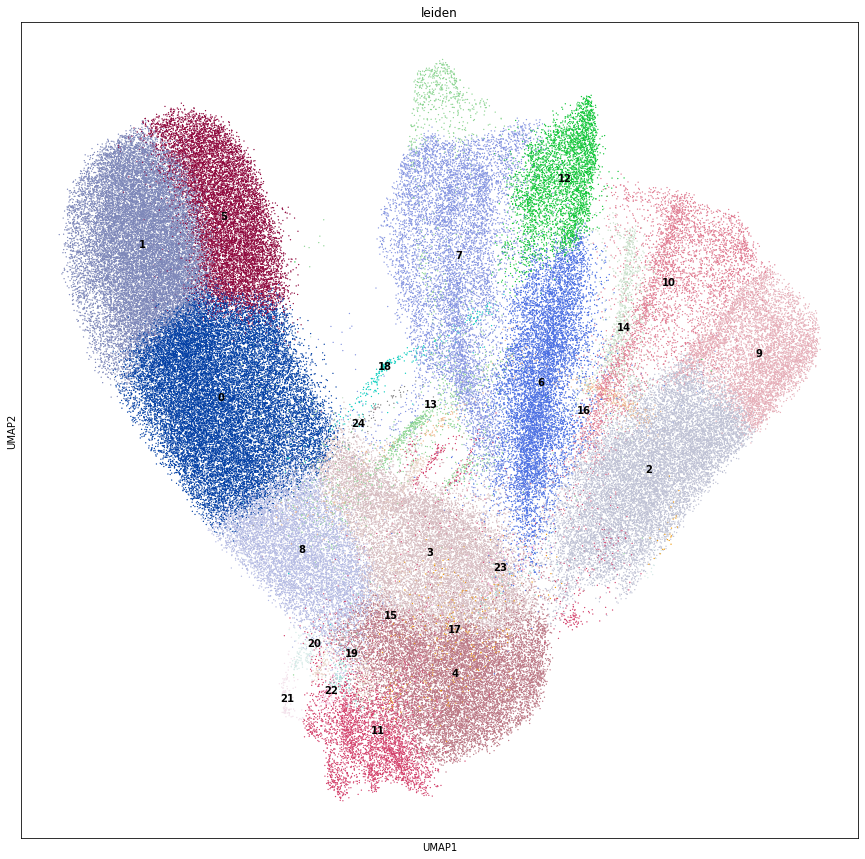

In [115]:
fig, ax = plt.subplots(figsize=(15,15))
sc.pl.umap(adata, color='leiden', ax=ax, size=7, legend_loc='on data')
plt.show()

In [123]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-

In [19]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).iloc[0:20,].to_csv('top_markers.csv')

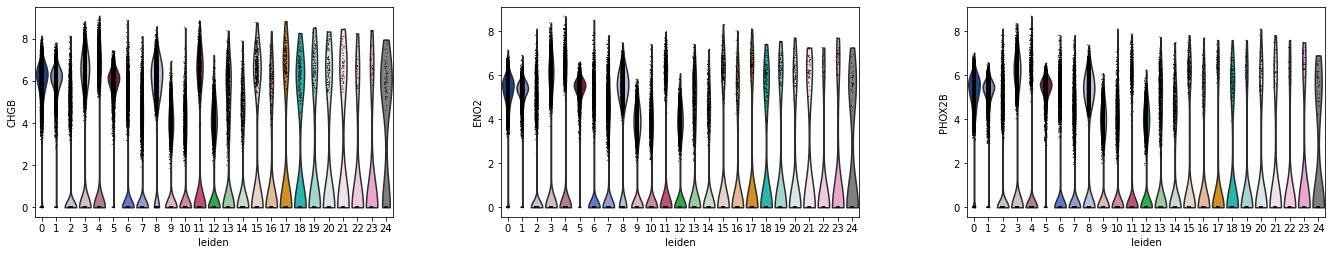

In [126]:
sc.pl.violin(adata, ['CHGB', 'ENO2', 'PHOX2B'], groupby='leiden')

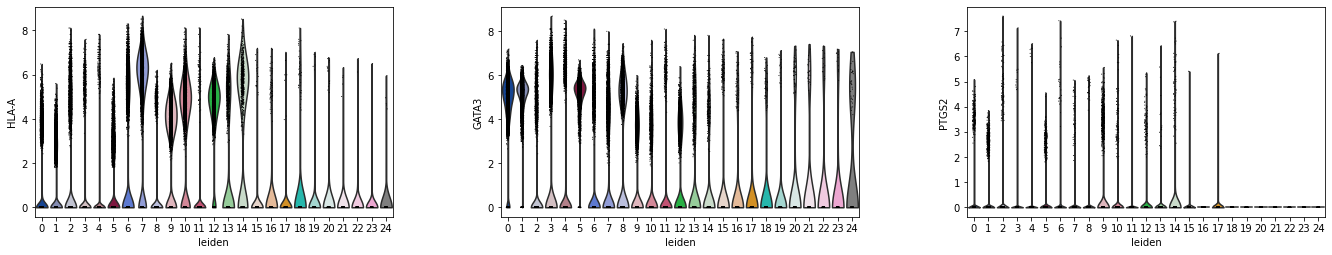

In [113]:
sc.pl.violin(adata, ['HLA-A', 'GATA3', 'PTGS2'], groupby='leiden')

In [16]:
list(filter(lambda x:'BMP' in x, adata.var_names))

['BMPR1B']

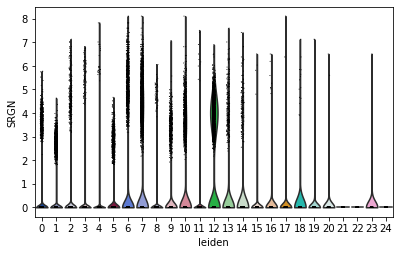

In [18]:
sc.pl.violin(adata, ['SRGN'], groupby='leiden')

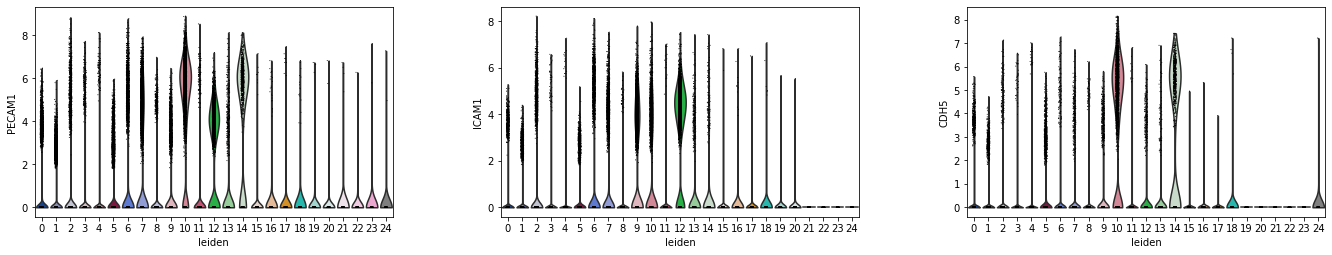

In [122]:
sc.pl.violin(adata, ['PECAM1', 'ICAM1', 'CDH5'], groupby='leiden')

## Adding annotations

Yasin annotated the clusters based on the top 10 cluster marker genes. Using that to call cell labels

In [2]:
adata = sc.read('baysor_seg.h5ad')
adata

AnnData object with n_obs × n_vars = 137694 × 398
    obs: 'cluster', 'x', 'y', 'global_x', 'global_y', 'n_genes', 'n_genes_by_counts', 'total_counts', 'leiden'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
cluster = pd.read_excel('../Documents/Cluster_Markers.xlsx', index_col=0)
cluster.head()

0           1           2           3            4   \
Cluster                                                                
Rank     Adrenergic  Adrenergic  Fibroblast  Adrenergic  Adrn_Cortex   
0              CHGB        SYN3      COL1A1        TUBB      CYP11B2   
1              ENO2       GRIK2         VIM       H3-3B        MYOM1   
2             MAP1B       GATA3       THBS1        PRPH         CD3G   
3             L1CAM       ALCAM       EPAS1      PHOX2B        DPP10   

                 5               6       7           8           9   ...  \
Cluster                                                              ...   
Rank     Adrenergic  Macrophage_TAM  T_Cell  Adrenergic  Fibroblast  ...   
0             GATA3            CD74    CD3E        CHGB      COL1A1  ...   
1            PHOX2B            C1QC   HLA-A       L1CAM         VIM  ...   
2              ENO2         HLA-DRA   CD247       GRIK2       THBS1  ...   
3              RTN3           MPEG1   HLA-B         ALK         FN1  ...   

                            15      16          17       18          19  \
Cluster                                                                   
Rank     Adrenergic_or_Schwann    Treg  Adrenergic  NK_Cell  Adrenergic   
0                     ARHGAP36   PDCD1       IL2RA     CCR2      OSBPL3   
1                         SPP1   FOXP3       CD274    IGHG1        RGS5   
2                      PPP2R2C  COL1A1        ELL2     CD68     CYP11B2   
3                        UNC5D   EPAS1       NLGN1  CYP11B2     ADCYAP1   

             20     21       22              23      24  
Cluster                                                  
Rank     B_Cell    TAC      TAC  Macrophage_TRM  B_Cell  
0        PRSS12  NTRK2  GRAMD1B            LMNA    FHIT  
1         CREB5  CALCA   LRRTM4          SLC2A3   GRIK2  
2          NCR1  GULP1    NR4A3            PKIB   KCNH5  
3          SV2C   CD3G   IMMP2L            COBL  FRMD4B  

[5 rows x 25 columns]

In [4]:
cl_dict = dict(zip(cluster.columns, cluster.loc["Rank",:]))

In [5]:
adata.obs['cell_type'] = adata.obs['leiden'].apply(lambda x: cl_dict[int(x)])

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical


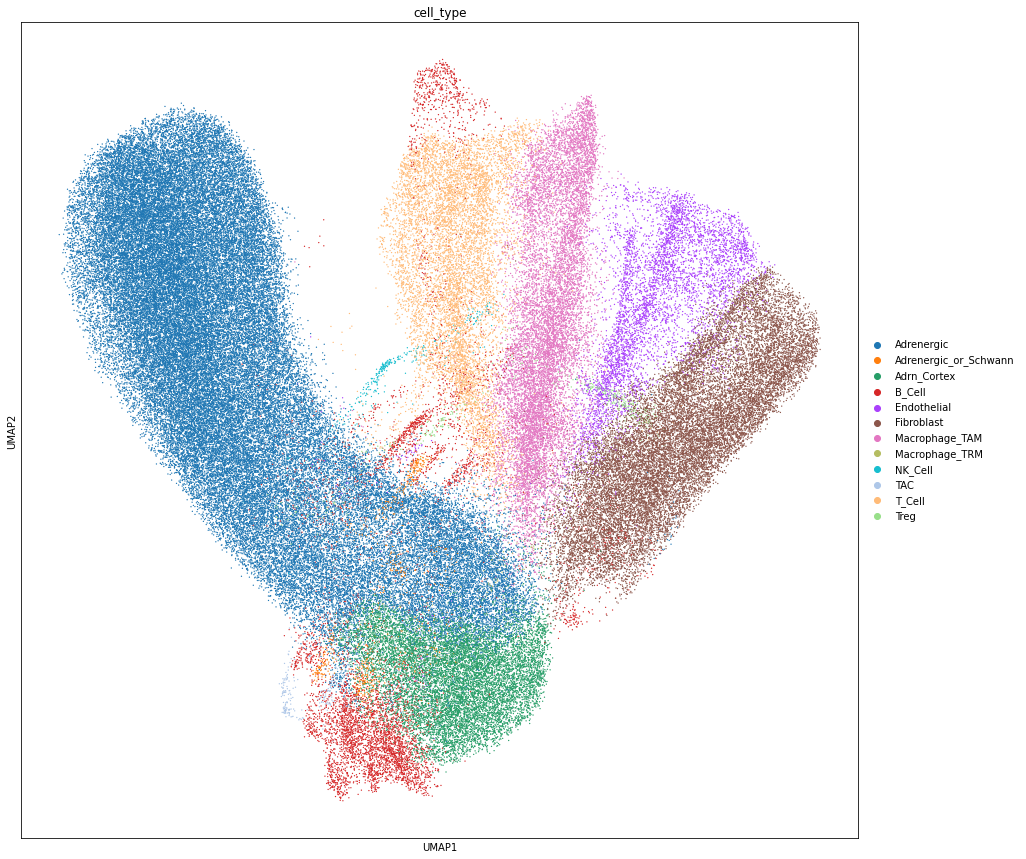

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
sc.pl.umap(adata, color='cell_type', ax=ax, size=7)
fig.savefig('plots/UMAP_labels.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
with open('adata_obs.pk', 'wb') as f:
    pk.dump(adata.obs, f)

In [28]:
adata.obs['x'].max()

107475.96995949162